## Get the Data

Either use the provided .csv file or (optionally) get fresh (the freshest?) data from running an SQL query on StackExchange: 

Follow this link to run the query from [StackExchange](https://data.stackexchange.com/stackoverflow/query/675441/popular-programming-languages-per-over-time-eversql-com) to get your own .csv file

<code>
select dateadd(month, datediff(month, 0, q.CreationDate), 0) m, TagName, count(*)
from PostTags pt
join Posts q on q.Id=pt.PostId
join Tags t on t.Id=pt.TagId
where TagName in ('java','c','c++','python','c#','javascript','assembly','php','perl','ruby','visual basic','swift','r','object-c','scratch','go','swift','delphi')
and q.CreationDate < dateadd(month, datediff(month, 0, getdate()), 0)
group by dateadd(month, datediff(month, 0, q.CreationDate), 0), TagName
order by dateadd(month, datediff(month, 0, q.CreationDate), 0)
</code>

## Import Statements

In [77]:
import pandas as pd
import matplotlib.pyplot as plt 

## Data Exploration

**Challenge**: Read the .csv file and store it in a Pandas dataframe

In [59]:
df = pd.read_csv('QueryResults.csv',date_format='%Y/%m/%d')
df.columns = ["DATE","TAG","POSTS"]

**Challenge**: Examine the first 5 rows and the last 5 rows of the of the dataframe

In [60]:
df.tail()

,DATE,TAG,POSTS
2812,2025-06-01 00:00:00,php,180
2813,2025-06-01 00:00:00,python,1130
2814,2025-06-01 00:00:00,r,273
2815,2025-06-01 00:00:00,ruby,29
2816,2025-06-01 00:00:00,swift,146


**Challenge:** Check how many rows and how many columns there are. 
What are the dimensions of the dataframe?

In [61]:
print(df.shape)

(2817, 3)


**Challenge**: Count the number of entries in each column of the dataframe

In [12]:
df.count()

DATE     2817
TAG      2817
POSTS    2817
dtype: int64

**Challenge**: Calculate the total number of post per language.
Which Programming language has had the highest total number of posts of all time?

In [66]:
most_posts = df.groupby('TAG')['POSTS'].sum()
most_posts.sort_values(ascending=False)


TAG
javascript    2528802
python        2209755
java          1918864
c#            1624136
php           1465845
c++            814407
r              510742
c              407899
swift          336216
ruby           229308
go              74407
perl            68343
delphi          52486
assembly        45104
Name: POSTS, dtype: int64

Some languages are older (e.g., C) and other languages are newer (e.g., Swift). The dataset starts in September 2008.

**Challenge**: How many months of data exist per language? Which language had the fewest months with an entry? 


In [58]:
most_months = df.groupby('TAG')['DATE'].nunique()
most_months.sort_values()

TAG
go            188
swift         194
r             201
assembly      203
c             203
c++           203
delphi        203
java          203
javascript    203
perl          203
php           203
python        203
ruby          203
c#            204
Name: DATE, dtype: int64

## Data Cleaning

Let's fix the date format to make it more readable. We need to use Pandas to change format from a string of "2008-07-01 00:00:00" to a datetime object with the format of "2008-07-01"

In [62]:
df['DATE'] = pd.to_datetime(df['DATE'])

In [63]:
df.head()

,DATE,TAG,POSTS
0,2008-07-01,c#,3
1,2008-08-01,assembly,8
2,2008-08-01,c,82
3,2008-08-01,c#,503
4,2008-08-01,c++,164


## Data Manipulation



**Challenge**: What are the dimensions of our new dataframe? How many rows and columns does it have? Print out the column names and print out the first 5 rows of the dataframe.

In [67]:
reshaped_df = df.pivot(index='DATE',columns='TAG',values='POSTS')

In [74]:
reshaped_df.fillna(0,inplace=True)

In [76]:
reshaped_df.isna().values.any()

False

**Challenge**: Count the number of entries per programming language. Why might the number of entries be different? 

## Data Visualisaton with with Matplotlib


**Challenge**: Use the [matplotlib documentation](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.plot.html#matplotlib.pyplot.plot) to plot a single programming language (e.g., java) on a chart.

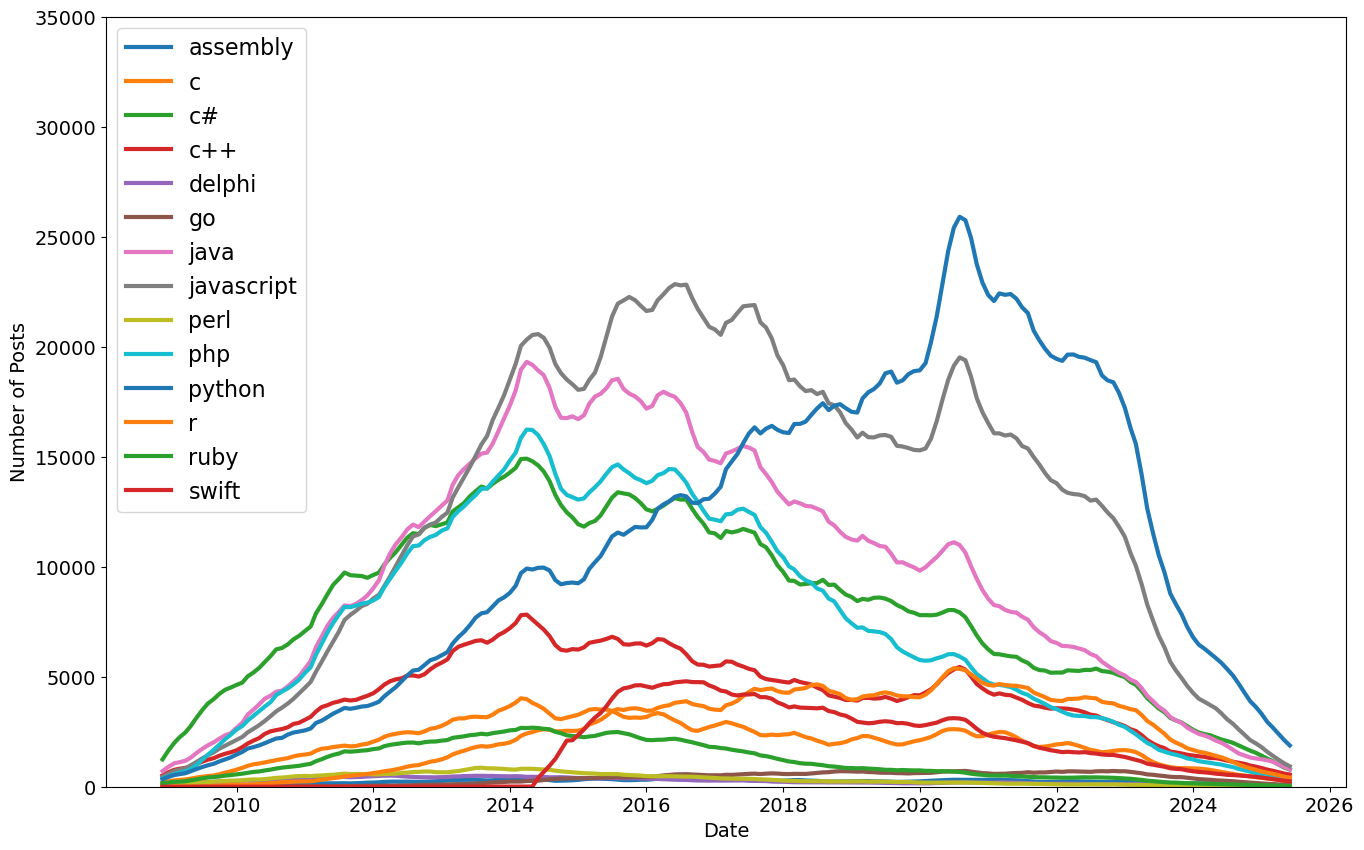

In [95]:
roll_df = reshaped_df.rolling(window=6).mean()
 
plt.figure(figsize=(16,10))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Number of Posts', fontsize=14)
plt.ylim(0, 35000)
 
# plot the roll_df instead
for column in roll_df.columns:
    plt.plot(roll_df.index, roll_df[column], 
             linewidth=3, label=roll_df[column].name)
 
plt.legend(fontsize=16)

**Challenge**: Show two line (e.g. for Java and Python) on the same chart.

# Smoothing out Time Series Data

Time series data can be quite noisy, with a lot of up and down spikes. To better see a trend we can plot an average of, say 6 or 12 observations. This is called the rolling mean. We calculate the average in a window of time and move it forward by one overservation. Pandas has two handy methods already built in to work this out: [rolling()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html) and [mean()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.core.window.rolling.Rolling.mean.html). 